In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid_activation(x):
    """compute the sigmoid activation value for a given input"""
    return 1.0 / (1 + np.exp(-x))

In [3]:
def predict(X, W):
    """take the dot product between our features and weight matrix"""
    preds = sigmoid_activation(X.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0.5] = 1

    return preds

In [4]:
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
                    cluster_std=1.5, random_state=1)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
y = y.reshape(1000, 1)

In [8]:
#The Bias trick
X = np.c_[X, np.ones((X.shape[0]))]
X.shape

(1000, 3)

In [9]:
(trainX, testX, trainY, testY) = train_test_split(X, y,
                                                  test_size=0.5, random_state=42)

[INFO] training...
[INFO] epoch=1, loss=242.4126685
[INFO] epoch=5, loss=17.5163349
[INFO] epoch=10, loss=10.9680804
[INFO] epoch=15, loss=7.1776599
[INFO] epoch=20, loss=6.9924840
[INFO] epoch=25, loss=6.9441728
[INFO] epoch=30, loss=5.7938876
[INFO] epoch=35, loss=4.1034297
[INFO] epoch=40, loss=2.4467443
[INFO] epoch=45, loss=1.3108084
[INFO] epoch=50, loss=1.0131035
[INFO] epoch=55, loss=0.6742445
[INFO] epoch=60, loss=0.3595134
[INFO] epoch=65, loss=0.1911979
[INFO] epoch=70, loss=0.1160137
[INFO] epoch=75, loss=0.0801985
[INFO] epoch=80, loss=0.0610041
[INFO] epoch=85, loss=0.0495416
[INFO] epoch=90, loss=0.0420670
[INFO] epoch=95, loss=0.0368418
[INFO] epoch=100, loss=0.0329834
[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.99      1.00      1.00       250

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg 

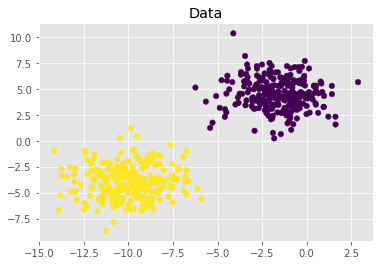

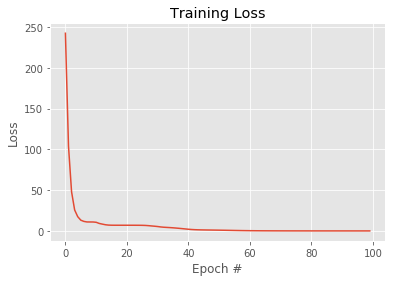

In [18]:
# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1) #(3, 1)
losses = []

# loop over the desired number of epochs
for epoch in np.arange(0, 100):
    # take the dot product between our features ‘X‘ and the weight
    # matrix ‘W‘, then pass this value through our sigmoid activation
    # function, thereby giving us our predictions on the dataset

    preds = sigmoid_activation(trainX.dot(W))

    # now that we have our predictions, we need to determine the
    # ‘error‘, which is the difference between our predictions and
    # the true values

    error = preds - trainY

    loss = np.sum(error ** 2)
    
    losses.append(loss)

    # the gradient descent update is the dot product between our
    # features and the error of the predictions

    gradient = trainX.T.dot(error)

    # in the update stage, all we need to do is "nudge" the weight
    # matrix in the negative direction of the gradient (hence the
    # term "gradient descent" by taking a small step towards a set
    # of "more optimal" parameters

    W += -0.01 * gradient

    # check to see if an update should be displayed

    if epoch == 0 or (epoch + 1) % 5 == 0:
        
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
                                                    loss))
        

# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

%matplotlib inline
# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY.reshape(500,), s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()